In [1]:
# Get stock data from either quantopian or quandl as a CSV file.
import quandl
quandl.ApiConfig.api_key = "axLRx8zPHQ7B8idwcNkW"
df = quandl.get('NSE/TATAGLOBAL')

In [2]:
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100.0,694.98
...,...,...,...,...,...,...,...
2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31


In [3]:
# Import necessary libraries and packages
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df.shape

(2100, 7)

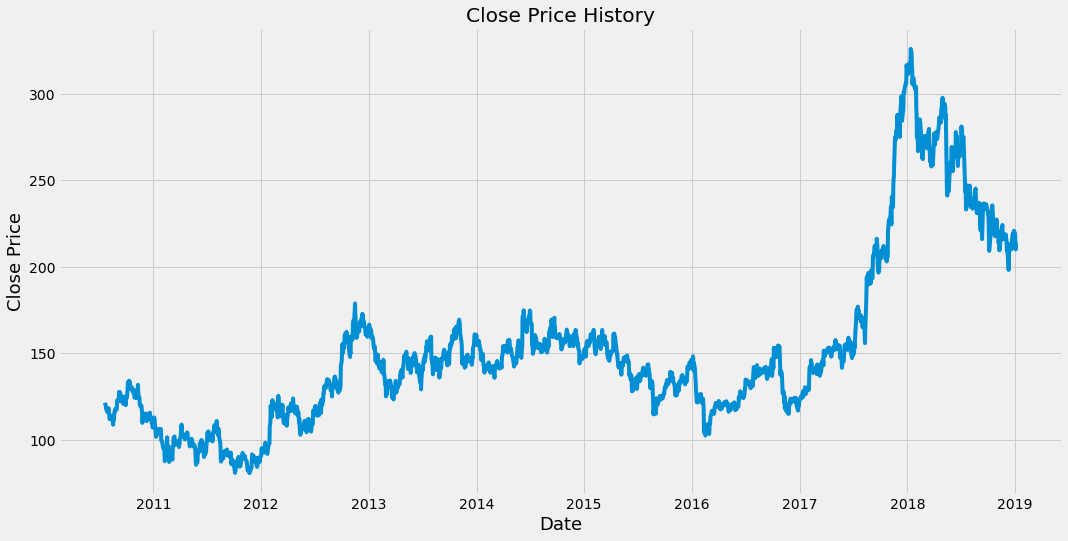

In [5]:
# Visualize the imported data

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [6]:
# Considering only Closing Price column 
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1680

In [7]:
# Scaling data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.54595588],
       [0.52736928],
       [0.54268791]])

In [8]:
#Preparing the Training data
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60 : i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.16584967, 0.16319444, 0.1621732 , 0.14971405, 0.15400327,
       0.15236928, 0.14562908, 0.14338235, 0.14848856, 0.15257353,
       0.14522059, 0.13521242, 0.12724673, 0.13031046, 0.12806373,
       0.13459967, 0.12908497, 0.13562092, 0.12377451, 0.1190768 ,
       0.11397059, 0.13112745, 0.12479575, 0.14603758, 0.14501634,
       0.14726307, 0.15196078, 0.1503268 , 0.14971405, 0.16156046,
       0.17177288, 0.1693219 , 0.16830065, 0.17238562, 0.19097222,
       0.18913399, 0.19138072, 0.18382353, 0.17544935, 0.17279412,
       0.16830065, 0.17034314, 0.17810458, 0.16973039, 0.16278595,
       0.17401961, 0.18035131, 0.17422386, 0.17116013, 0.16564542,
       0.16033497, 0.17381536, 0.17851307, 0.18811275, 0.19750817,
       0.21425654, 0.21098856, 0.21772876, 0.20445261, 0.21568627])]
[0.21282679738562094]

[array([0.16584967, 0.16319444, 0.1621732 , 0.14971405, 0.15400327,
       0.15236928, 0.14562908, 0.14338235, 0.14848856, 0.15257353,
       0.14522059, 0.13521242, 0.12

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1620, 60, 1)

In [11]:
#Preparing the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1620/1620 [==============================] - 187s 116ms/step - loss: 8.3394e-04


In [14]:
#Preparing the test data from index 1620 to the last
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0])


In [15]:
x_test = np.array(x_test)

In [16]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Predicting the model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Root Mean Square Error of the model
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.679063560849145

<ipython-input-19-308770e25339>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


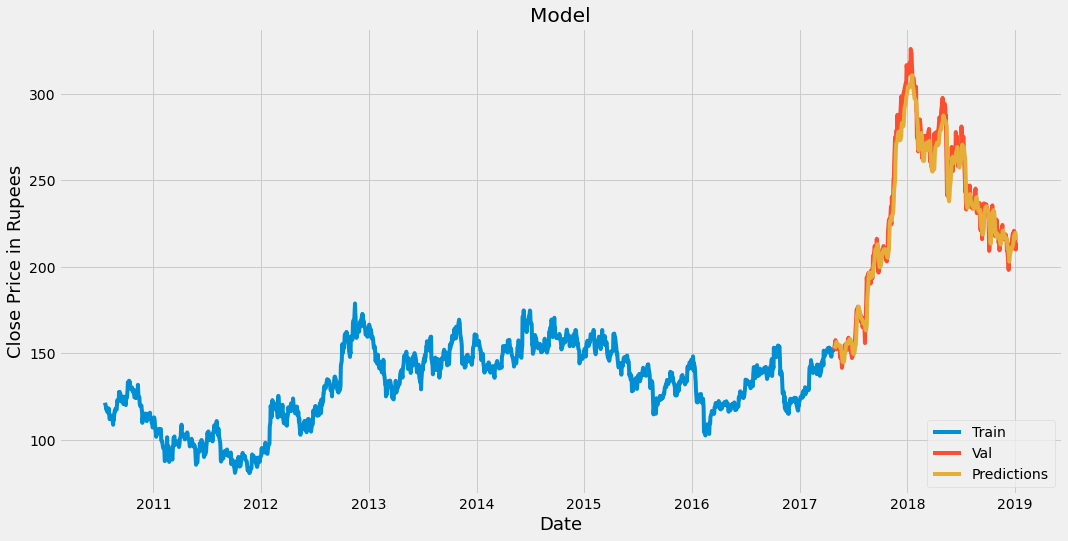

In [19]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price in Rupees', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
# Display the valid and predicted prices
valid

,Close,Predictions
Date,,
2017-04-27,152.10,152.967590
2017-04-28,153.10,153.342773
2017-05-02,157.70,153.678497
2017-05-03,156.20,154.909363
2017-05-04,155.35,155.967575
...,...,...
2018-12-31,219.40,218.957214
2019-01-01,219.10,219.525177
2019-01-02,214.60,219.477905
